In [86]:
#importar librerias
import pandas as pd
from sklearn.metrics import auc
from matplotlib import pyplot as plt
from matplotlib import patches
from sklearn.model_selection import train_test_split    
from sklearn.metrics import precision_score, mean_squared_error, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Leer el dataset
dataset = pd.read_csv('notebook/datos/diabetes.csv', sep=',')

#datset.head()
dataset.tail()
#dataset.shape
#set(dataset['class'])

,preg,plas,pres,skin,insu,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive
767,1,93,70,31,0,30.4,0.315,23,tested_negative


In [26]:
#escalar los datos
scaler = MinMaxScaler()

X_dataset = dataset.drop('class',axis=1)
Y_dataset = dataset['class']

X_dataset.head()
#Y_dataset.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [30]:
XdatasetScaled = pd.DataFrame(scaler.fit_transform(X_dataset), columns = X_dataset.columns)

XdatasetScaled.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [34]:
#separar la clase
Xset = XdatasetScaled
Yset = dataset['class']
print(Xset.shape[0]==Yset.shape[0])

True


In [36]:
Xtrainset, Xtestset, Ytrainset, Ytestset = train_test_split(Xset,Yset,test_size=0.2)

In [39]:
#primero realizamos la regresion logistica
logreg = linear_model.LogisticRegression()

logreg.fit(Xtrainset,Ytrainset)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
#reporte de resultados

ytrainingPred = logreg.predict(Xtrainset)
trainprecision = accuracy_score(Ytrainset, ytrainingPred)
print('Precision de entrenamiento:',str(trainprecision))
ytestPred = logreg.predict(Xtestset)
testprecision = accuracy_score(Ytestset,ytestPred)
print('Precision de pruebas', str(testprecision))

confmatrix = confusion_matrix(Ytestset,ytestPred, 
                              labels=['tested_negative','tested_positive'])

table = pd.DataFrame(confmatrix)
table.columns = ['tested_negative', 'tested_positive']
table.index = ['tested_negative', 'tested_positive']
print('\n//////////////////////\nConfusion Matrix\n/////////////////////\n')
print(table)

print('\n//////////////////////\nMetrics\n/////////////////////\n')

print(classification_report(Ytestset,ytestPred))

Precision de entrenamiento: 0.7785016286644951
Precision de pruebas 0.7402597402597403

//////////////////////
Confusion Matrix
/////////////////////

                 tested_negative  tested_positive
tested_negative               82                8
tested_positive               32               32

//////////////////////
Metrics
/////////////////////

                 precision    recall  f1-score   support

tested_negative       0.72      0.91      0.80        90
tested_positive       0.80      0.50      0.62        64

      micro avg       0.74      0.74      0.74       154
      macro avg       0.76      0.71      0.71       154
   weighted avg       0.75      0.74      0.73       154



AUC: 0.8182291666666667


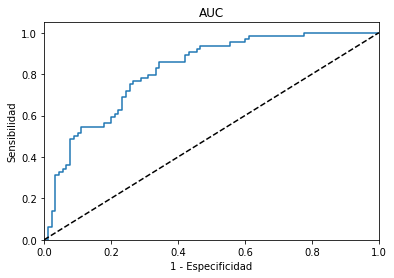

In [71]:
#area bajo la curva
yScore = logreg.decision_function(Xtestset)

frp, tpr, thresholds = roc_curve(Ytestset,yScore,
                                pos_label = 'tested_positive')

plt.plot(frp,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('AUC');

print('AUC:',auc(frp,tpr))

In [73]:
#SVC
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(Xtrainset,Ytrainset)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [78]:
#reporte de resultados
YsvcPrediction = classifier.predict(Xtestset)


confmatrixsvc = confusion_matrix(Ytestset,YsvcPrediction, 
                              labels=['tested_negative','tested_positive'])

tablesvc = pd.DataFrame(confmatrixsvc)
tablesvc.columns = ['tested_negative', 'tested_positive']
tablesvc.index = ['tested_negative', 'tested_positive']
print('\n//////////////////////\nConfusion Matrix\n/////////////////////\n')
print(table)

print('\n//////////////////////\nMetrics\n/////////////////////\n')

print(classification_report(Ytestset,YsvcPrediction))


//////////////////////
Confusion Matrix
/////////////////////

                 tested_negative  tested_positive
tested_negative               82                8
tested_positive               32               32

//////////////////////
Metrics
/////////////////////

                 precision    recall  f1-score   support

tested_negative       0.72      0.88      0.79        90
tested_positive       0.76      0.53      0.62        64

      micro avg       0.73      0.73      0.73       154
      macro avg       0.74      0.70      0.71       154
   weighted avg       0.74      0.73      0.72       154




//////////////////////
Metrics LogReg
/////////////////////

                 precision    recall  f1-score   support

tested_negative       0.72      0.91      0.80        90
tested_positive       0.80      0.50      0.62        64

      micro avg       0.74      0.74      0.74       154
      macro avg       0.76      0.71      0.71       154
   weighted avg       0.75      0.74      0.73       154


//////////////////////
Metrics SVC
/////////////////////

                 precision    recall  f1-score   support

tested_negative       0.72      0.88      0.79        90
tested_positive       0.76      0.53      0.62        64

      micro avg       0.73      0.73      0.73       154
      macro avg       0.74      0.70      0.71       154
   weighted avg       0.74      0.73      0.72       154

AUC Regresion Logistica 0.8182291666666667
AUC SVC: 0.8286458333333334


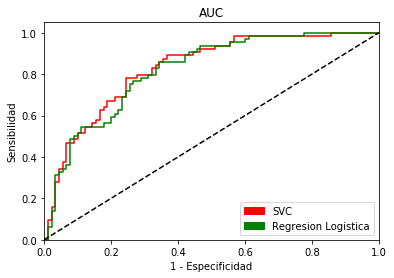

In [90]:
#comparar regresion logistica y SVC

YsvcScore = classifier.decision_function(Xtestset)

svcfrp, svctpr, svcthresholds = roc_curve(Ytestset,YsvcScore,
                                pos_label = 'tested_positive')

redpatch = patches.Patch(color='red',label = 'SVC')
greenpatch = patches.Patch(color='green', label = 'Regresion Logistica')

plt.plot(svcfrp,svctpr,'r-')
plt.plot(frp,tpr,'g-')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.legend(handles=[redpatch,greenpatch])
plt.title('AUC');

print('\n//////////////////////\nMetrics LogReg\n/////////////////////\n')
print(classification_report(Ytestset,ytestPred))
print('\n//////////////////////\nMetrics SVC\n/////////////////////\n')
print(classification_report(Ytestset,YsvcPrediction))

print('AUC Regresion Logistica', auc(frp,tpr))
print('AUC SVC:',auc(svcfrp,svctpr))